In [1]:
%matplotlib inline

In [2]:
import numpy as np
import matplotlib.pyplot as plt

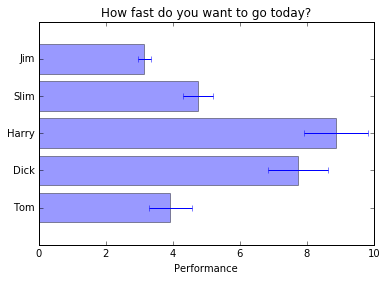

In [3]:
people = ('Tom', 'Dick', 'Harry', 'Slim', 'Jim')
y_pos = np.arange(len(people))
performance = 3 + 10 * np.random.rand(len(people))
error = np.random.rand(len(people))

plt.barh(y_pos, performance, xerr=error, align='center', alpha=0.4)
plt.yticks(y_pos, people)
plt.xlabel('Performance')
plt.title('How fast do you want to go today?')

plt.show()

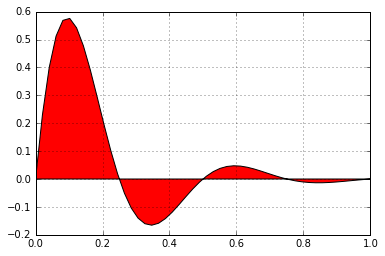

In [4]:
x = np.linspace(0, 1)
y = np.sin(4 * np.pi * x) * np.exp(-5 * x)

plt.fill(x, y, 'r')
plt.grid(True)
plt.show()

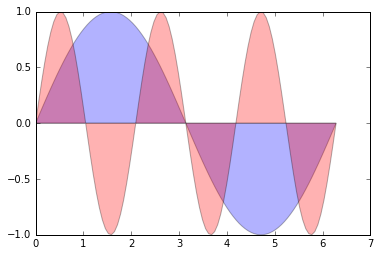

In [5]:
x = np.linspace(0, 2 * np.pi, 100)
y1 = np.sin(x)
y2 = np.sin(3 * x)
plt.fill(x, y1, 'b', x, y2, 'r', alpha=0.3)
plt.show()

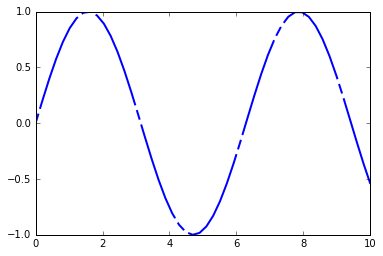

In [6]:
x = np.linspace(0, 10)
line, = plt.plot(x, np.sin(x), '--', linewidth=2)

dashes = [10, 5, 100, 5]  # 10 points on, 5 off, 100 on, 5 off
line.set_dashes(dashes)

plt.show()

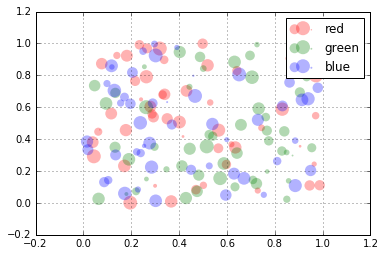

In [8]:
from numpy.random import rand
for color in ['red', 'green', 'blue']:
    n = 50
    x, y = rand(2, n)
    scale = 200.0 * rand(n)
    plt.scatter(x, y, c=color, s=scale, label=color, alpha=0.3, edgecolors='none')

plt.legend()
plt.grid(True)
plt.show()

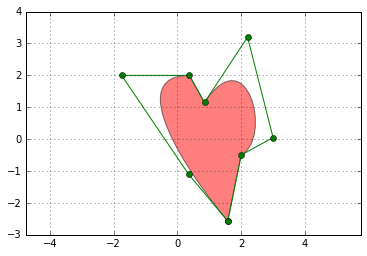

In [10]:
import matplotlib.path as mpath
import matplotlib.patches as mpatches

fig, ax = plt.subplots()

Path = mpath.Path
path_data = [
    (Path.MOVETO, (1.58, -2.57)),
    (Path.CURVE4, (0.35, -1.1)),
    (Path.CURVE4, (-1.75, 2.0)),
    (Path.CURVE4, (0.375, 2.0)),
    (Path.LINETO, (0.85, 1.15)),
    (Path.CURVE4, (2.2, 3.2)),
    (Path.CURVE4, (3, 0.05)),
    (Path.CURVE4, (2.0, -0.5)),
    (Path.CLOSEPOLY, (1.58, -2.57)),
    ]
codes, verts = zip(*path_data)
path = mpath.Path(verts, codes)
patch = mpatches.PathPatch(path, facecolor='r', alpha=0.5)
ax.add_patch(patch)

# plot control points and connecting lines
x, y = zip(*path.vertices)
line, = ax.plot(x, y, 'go-')

ax.grid()
ax.axis('equal')
plt.show()

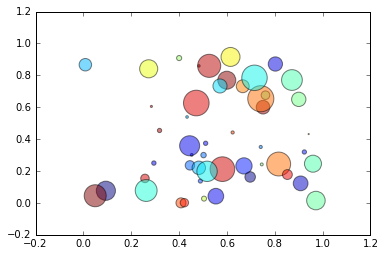

In [11]:
N = 50
x = np.random.rand(N)
y = np.random.rand(N)
colors = np.random.rand(N)
area = np.pi * (15 * np.random.rand(N))**2  # 0 to 15 point radiuses

plt.scatter(x, y, s=area, c=colors, alpha=0.5)
plt.show()

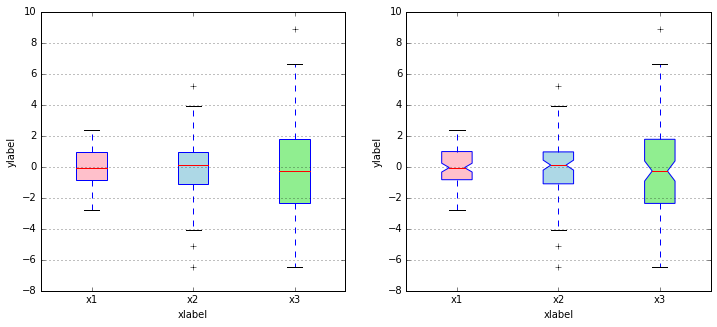

In [12]:
# Random test data
np.random.seed(123)
all_data = [np.random.normal(0, std, 100) for std in range(1, 4)]

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 5))

# rectangular box plot
bplot1 = axes[0].boxplot(all_data,
                         vert=True,   # vertical box aligmnent
                         patch_artist=True)   # fill with color

# notch shape box plot
bplot2 = axes[1].boxplot(all_data,
                         notch=True,  # notch shape
                         vert=True,   # vertical box aligmnent
                         patch_artist=True)   # fill with color

# fill with colors
colors = ['pink', 'lightblue', 'lightgreen']
for bplot in (bplot1, bplot2):
    for patch, color in zip(bplot['boxes'], colors):
        patch.set_facecolor(color)

# adding horizontal grid lines
for ax in axes:
    ax.yaxis.grid(True)
    ax.set_xticks([y+1 for y in range(len(all_data))], )
    ax.set_xlabel('xlabel')
    ax.set_ylabel('ylabel')

# add x-tick labels
plt.setp(axes, xticks=[y+1 for y in range(len(all_data))],
         xticklabels=['x1', 'x2', 'x3', 'x4'])

plt.show()

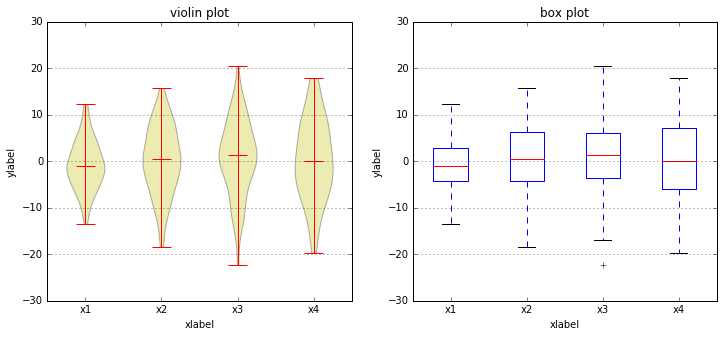

In [13]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 5))

# generate some random test data
all_data = [np.random.normal(0, std, 100) for std in range(6, 10)]

# plot violin plot
axes[0].violinplot(all_data,
                   showmeans=False,
                   showmedians=True)
axes[0].set_title('violin plot')

# plot box plot
axes[1].boxplot(all_data)
axes[1].set_title('box plot')

# adding horizontal grid lines
for ax in axes:
    ax.yaxis.grid(True)
    ax.set_xticks([y+1 for y in range(len(all_data))])
    ax.set_xlabel('xlabel')
    ax.set_ylabel('ylabel')

# add x-tick labels
plt.setp(axes, xticks=[y+1 for y in range(len(all_data))],
         xticklabels=['x1', 'x2', 'x3', 'x4'])
plt.show()

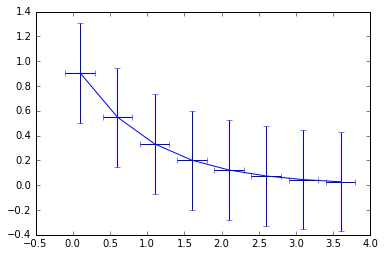

In [14]:
x = np.arange(0.1, 4, 0.5)
y = np.exp(-x)

plt.errorbar(x, y, xerr=0.2, yerr=0.4)
plt.show()

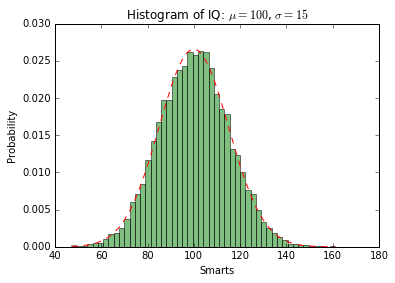

In [16]:
import matplotlib.mlab as mlab
mu = 100  # mean of distribution
sigma = 15  # standard deviation of distribution
x = mu + sigma * np.random.randn(10000)

num_bins = 50
# the histogram of the data
n, bins, patches = plt.hist(x, num_bins, normed=1, facecolor='green', alpha=0.5)
# add a 'best fit' line
y = mlab.normpdf(bins, mu, sigma)
plt.plot(bins, y, 'r--')
plt.xlabel('Smarts')
plt.ylabel('Probability')
plt.title(r'Histogram of IQ: $\mu=100$, $\sigma=15$')

# Tweak spacing to prevent clipping of ylabel
plt.subplots_adjust(left=0.15)
plt.show()

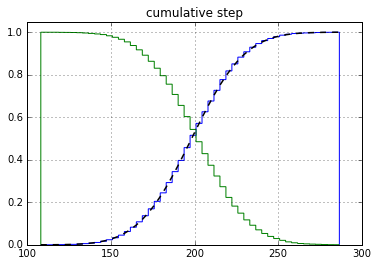

In [17]:
mu = 200
sigma = 25
n_bins = 50
x = mu + sigma*np.random.randn(10000)

n, bins, patches = plt.hist(x, n_bins, normed=1,
                            histtype='step', cumulative=True)

# Add a line showing the expected distribution.
y = mlab.normpdf(bins, mu, sigma).cumsum()
y /= y[-1]
plt.plot(bins, y, 'k--', linewidth=1.5)

# Overlay a reversed cumulative histogram.
plt.hist(x, bins=bins, normed=1, histtype='step', cumulative=-1)

plt.grid(True)
plt.ylim(0, 1.05)
plt.title('cumulative step')

plt.show()